In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from common import rank_order, get_all_data

players, ranked_matches, ranked_player_match_data, swiftplay_matches, swiftplay_player_match_data = get_all_data()

In [2]:
print(players.columns)
print(ranked_matches.columns)
print(ranked_player_match_data.columns)
print(swiftplay_matches.columns)
print(swiftplay_player_match_data.columns)

Index(['puuid', 'summonerLevel', 'tier', 'rank', 'swiftplay_kills',
       'swiftplay_deaths', 'swiftplay_assists', 'swiftplay_kd', 'swiftplay_ad',
       'swiftplay_kda', 'swiftplay_kad', 'swiftplay_win_loss_ratio',
       'ranked_kills', 'ranked_deaths', 'ranked_assists', 'ranked_kd',
       'ranked_ad', 'ranked_kda', 'ranked_kad', 'ranked_win_loss_ratio',
       'full_rank'],
      dtype='object')
Index(['matchId', 'gameDuration', 'endOfGameResult', 'gameEndedInSurrender',
       'gameEndedInEarlySurrender'],
      dtype='object')
Index(['matchId', 'puuid', 'teamId', 'summonerLevel', 'role', 'teamPosition',
       'kills', 'deaths', 'assists', 'championId', 'win',
       'teamEarlySurrendered', 'totalTimeSpentDead', 'timePlayed',
       'longestTimeSpentLiving', 'tier', 'rank', 'championLevel',
       'championPoints', 'full_rank'],
      dtype='object')
Index(['matchId', 'gameDuration', 'endOfGameResult', 'gameEndedInSurrender',
       'gameEndedInEarlySurrender'],
      dtype='obj

# Rank

## Swiftplay vs. Ranked

### Swiftplay Distribution

<Axes: xlabel='full_rank'>

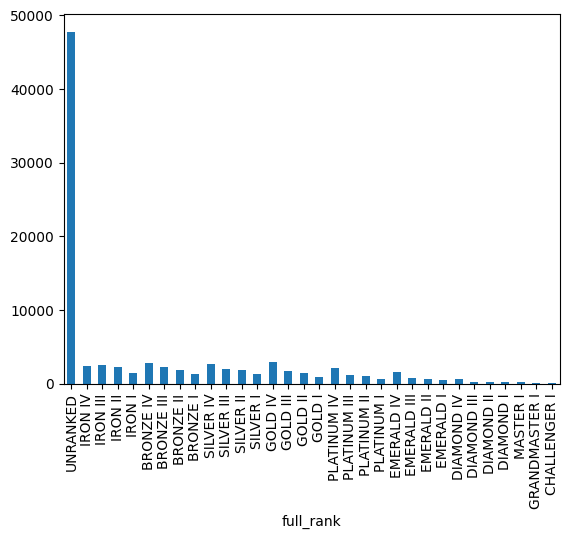

In [24]:
swiftplay_player_match_data.groupby("puuid")["full_rank"].first().value_counts().reindex(rank_order).plot(kind='bar')

<Axes: xlabel='full_rank'>

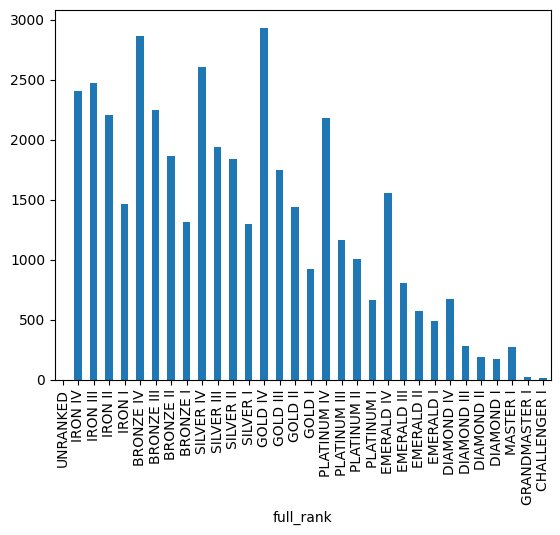

In [25]:
swiftplay_player_match_data.groupby("puuid")["full_rank"].first().value_counts().drop("UNRANKED").reindex(rank_order).plot(kind='bar')

### Ranked Distribution

<Axes: xlabel='full_rank'>

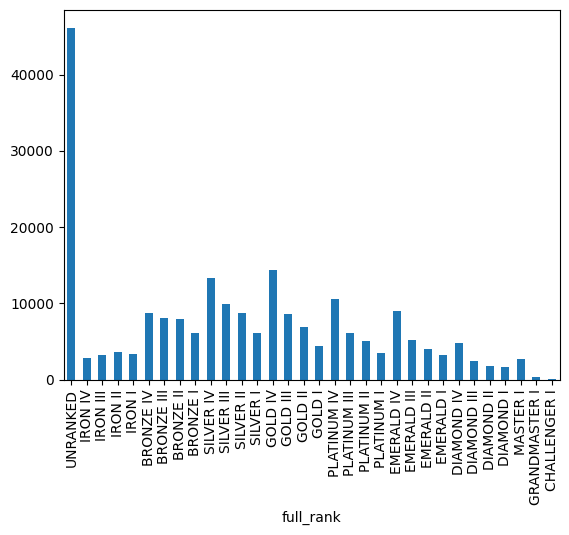

In [26]:
ranked_player_match_data.groupby("puuid")["full_rank"].first().value_counts().reindex(rank_order).plot(kind='bar')

<Axes: xlabel='full_rank'>

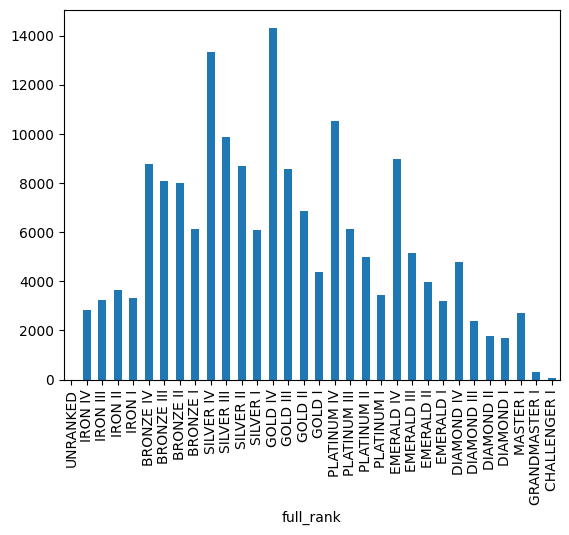

In [27]:
ranked_player_match_data.groupby("puuid")["full_rank"].first().value_counts().drop("UNRANKED").reindex(rank_order).plot(kind='bar')

## Swiftplay: Winning vs. Losing Teams

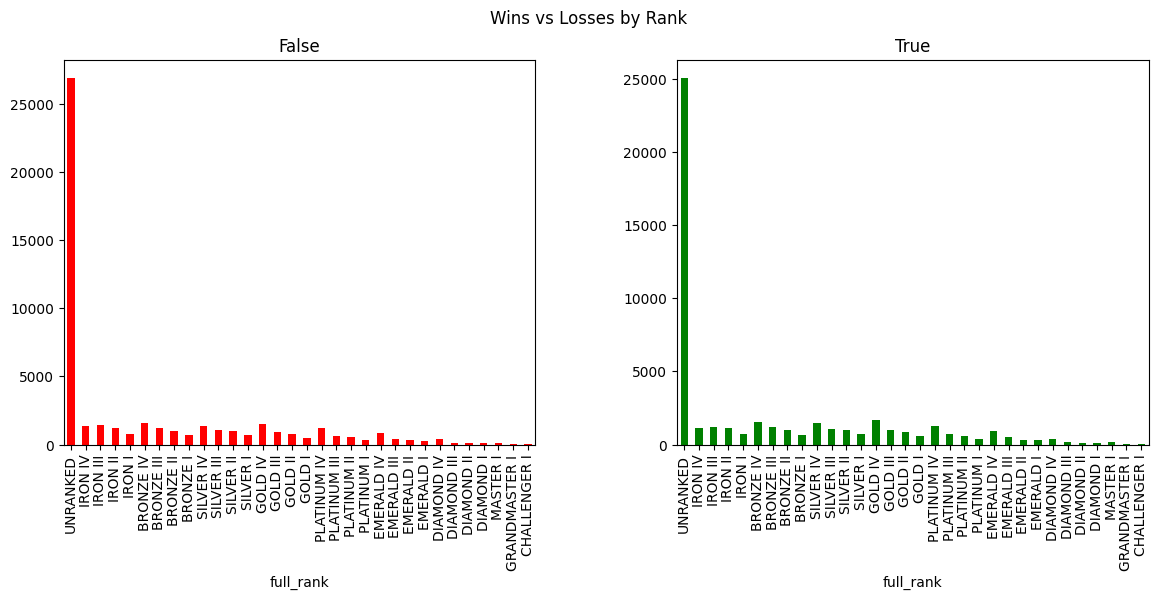

In [46]:
# Group by puuid and get each player's first recorded rank
player_ranks = swiftplay_player_match_data.groupby(["puuid", "win"])["full_rank"].first().reset_index()

# Count occurrences of each rank for win=0 and win=1
rank_counts = player_ranks.groupby("win")["full_rank"].value_counts().unstack(fill_value=0)  # Convert to DataFrame

# Reorder columns based on rank_order
rank_counts = rank_counts.reindex(columns=rank_order, fill_value=0)

rank_counts.T.plot(kind="bar", subplots=True, layout=(1, 2), figsize=(14, 5), legend=False, color=["red", "green"])

# Customize the plots
plt.suptitle("Wins vs Losses by Rank")
plt.subplots_adjust(wspace=0.3)  # Adjust space between subplots
plt.show()

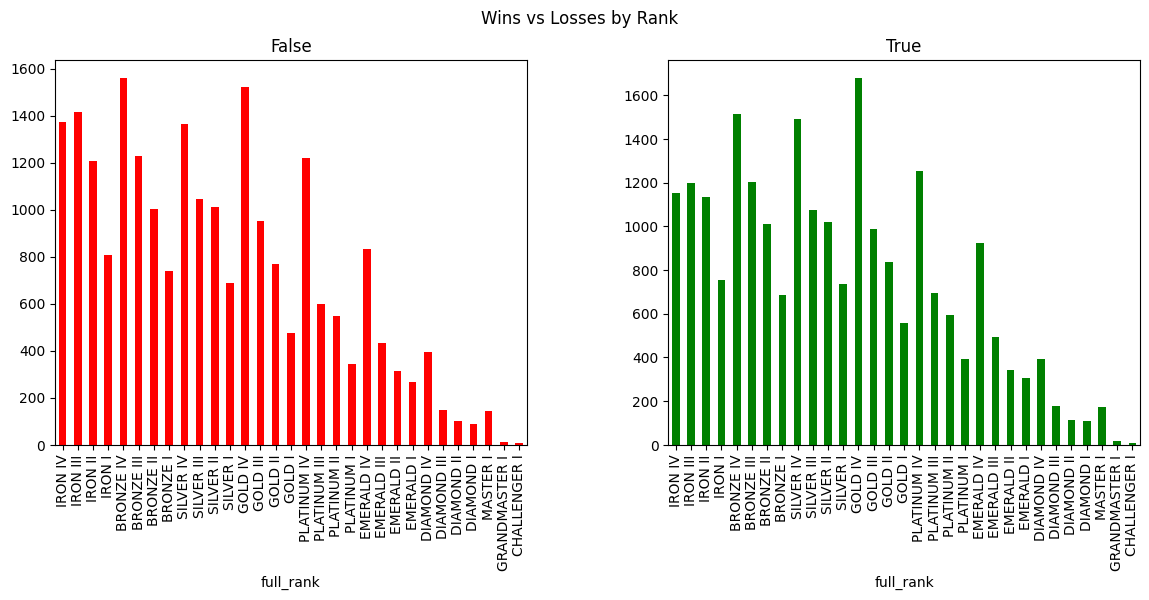

In [ ]:
rank_counts.T.drop("UNRANKED").plot(kind="bar", subplots=True, layout=(1, 2), figsize=(14, 5), legend=False, color=["red", "green"])

plt.suptitle("Wins vs Losses by Rank")
plt.subplots_adjust(wspace=0.3)
plt.show()

# Summoner Level

## Swifplay vs. Ranked

### Swiftplay Distribution

<Axes: ylabel='Frequency'>

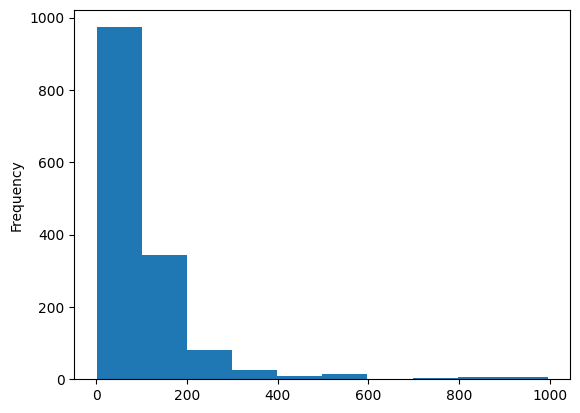

In [32]:
swiftplay_player_match_data["summonerLevel"].value_counts().plot(kind='hist')

### Ranked Distribution

<Axes: ylabel='Frequency'>

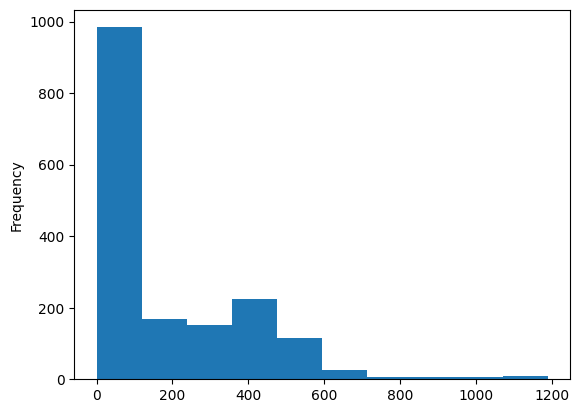

In [33]:
ranked_player_match_data["summonerLevel"].value_counts().plot(kind='hist')

## Swiftplay: Winning vs. Losing Teams

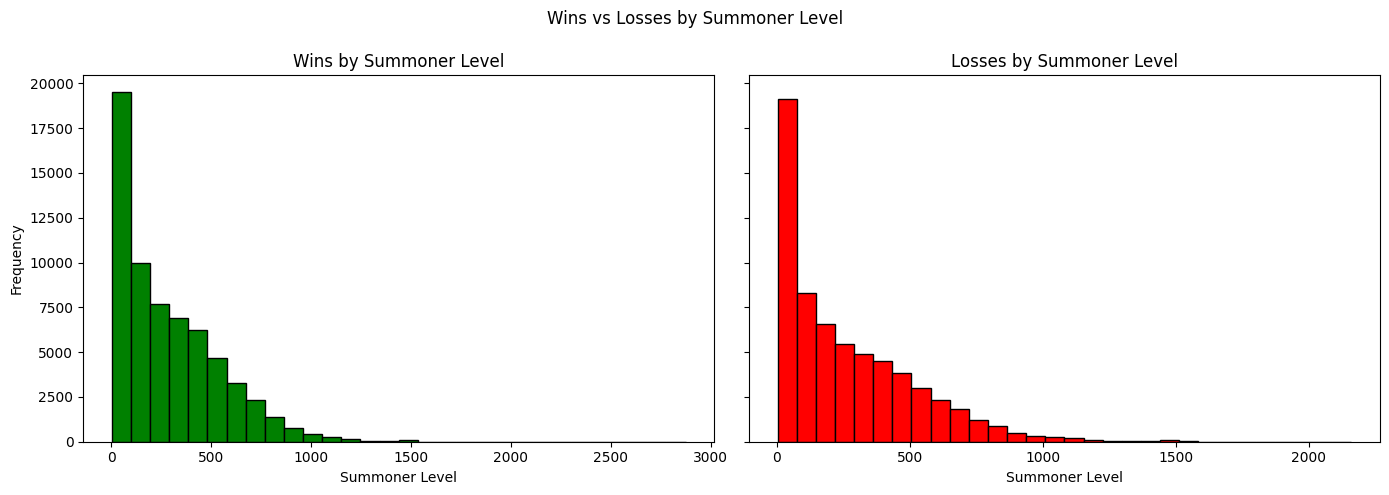

In [49]:
player_levels = swiftplay_player_match_data[['summonerLevel', 'win']]

# Plot histograms for summonerLevel, separate by win and loss
fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot for wins (win = 1)
player_levels[player_levels['win'] == 1]['summonerLevel'].plot(kind='hist', bins=30, ax=ax[0], color='green', edgecolor='black')
ax[0].set_title("Wins by Summoner Level")
ax[0].set_xlabel("Summoner Level")
ax[0].set_ylabel("Frequency")

# Plot for losses (win = 0)
player_levels[player_levels['win'] == 0]['summonerLevel'].plot(kind='hist', bins=30, ax=ax[1], color='red', edgecolor='black')
ax[1].set_title("Losses by Summoner Level")
ax[1].set_xlabel("Summoner Level")
ax[1].set_ylabel("Frequency")

# Overall title
plt.suptitle("Wins vs Losses by Summoner Level")

# Show plot
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust space for the suptitle
plt.show()

# Champion Mastery

# K/D

# K/A